In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [28]:
# Find the most recent date in the data set.
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

last_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_string = last_date_str[0]


id
station
date
prcp
tobs


In [29]:
#y = func.strftime("%Y","%m","%d",last_date_string) 
list = last_date_string.split('-')
y = int(list[0])
m = int(list[1])
d = int(list[2])


print(dt.date(y,m,d))

2017-08-23


2016-08-23


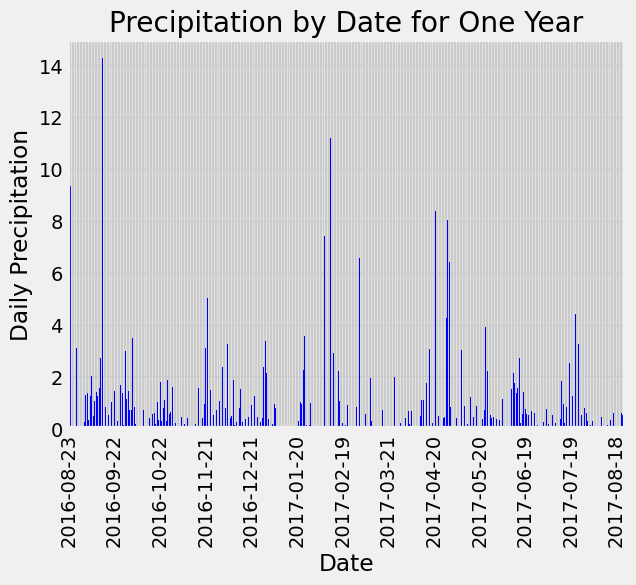

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_before = dt.date(y, m ,d)-dt.timedelta(days=365)
print(year_before)
# Perform a query to retrieve the data and precipitation scores

one_year = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date>= year_before).\
        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(one_year, columns = ['id', 'Station', 'Date', "Precipitation", 'Obs Temp'])

# Sort the dataframe by date

precip_by_date = one_year_df.groupby('Date')['Precipitation'].sum().reset_index()
precip_by_date.head()
# Use Pandas Plotting with Matplotlib to plot the data
Precip = precip_by_date.plot.bar(x='Date', y='Precipitation', color = 'blue', rot = 90, legend = None, xlabel = 'Date', ylabel = 'Daily Precipitation')
for index, label in enumerate(Precip.xaxis.get_ticklabels()):
    if index % 30 != 0:
        label.set_visible(False)
plt.title('Precipitation by Date for One Year')
plt.show()

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [32]:
precip_dict = one_year_df.set_index('Date')['Precipitation'].to_dict()
print(precip_dict)

{'2016-08-23': 0.7, '2016-08-24': 1.45, '2016-08-25': 0.11, '2016-08-26': 0.01, '2016-08-27': nan, '2016-08-28': 2.07, '2016-08-29': 0.9, '2016-08-30': 0.05, '2016-08-31': 2.46, '2016-09-01': 0.01, '2016-09-02': 0.03, '2016-09-03': 1.0, '2016-09-04': 0.44, '2016-09-05': 0.18, '2016-09-06': 1.0, '2016-09-07': 1.35, '2016-09-08': 0.15, '2016-09-09': 0.35, '2016-09-10': 1.16, '2016-09-11': 0.6, '2016-09-12': 1.04, '2016-09-13': 1.2, '2016-09-14': 6.7, '2016-09-15': 3.35, '2016-09-16': 0.61, '2016-09-17': 0.23, '2016-09-18': 0.42, '2016-09-19': 0.25, '2016-09-20': 0.43, '2016-09-21': 1.02, '2016-09-22': 0.75, '2016-09-23': 0.33, '2016-09-24': 0.27, '2016-09-25': 0.04, '2016-09-26': 1.02, '2016-09-27': 1.0, '2016-09-28': 0.05, '2016-09-29': 1.49, '2016-09-30': 0.38, '2016-10-01': 1.02, '2016-10-02': 0.61, '2016-10-03': 0.46, '2016-10-04': 3.46, '2016-10-05': 0.81, '2016-10-06': 0.04, '2016-10-07': 0.01, '2016-10-08': 0.04, '2016-10-09': 0.0, '2016-10-10': 0.0, '2016-10-11': 0.35, '2016-10-1

# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'])

query1 = session.query(Station.station).count()
print(query1)

id
station
name
latitude
longitude
elevation
9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Station.station, func.count(Station.station)]
id_vals = session.query(*sel).group_by(Station.station).all()
id_vals

ids = []
for i in id_vals:
    ids.append(i[0])

print (ids)

['USC00511918', 'USC00513117', 'USC00514830', 'USC00516128', 'USC00517948', 'USC00518838', 'USC00519281', 'USC00519397', 'USC00519523']


In [58]:
#Get the most active station

results = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

results


('USC00519281', 2772)

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = results[0]
print(most_active)

sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temps = session.query(*sel).\
    filter(Measurement.station == most_active).all()
temps

USC00519281


[(54.0, 85.0, 71.66378066378067)]

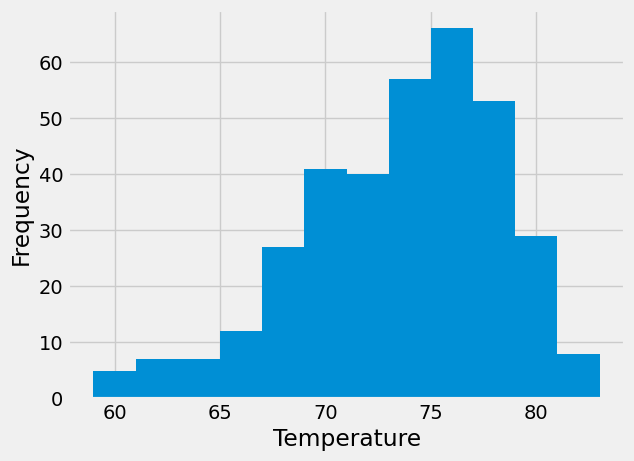

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date>= year_before,Measurement.station == most_active).\
        order_by(Measurement.date).all()

active_year_df = pd.DataFrame(active_year, columns = ['Date', 'Temperature'])

plt.hist(active_year_df['Temperature'], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [39]:
active_year

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

# Close Session

In [64]:
#This cell is for pasting code to check that it works.

[(56.0, 85.0, 72.23660130718955)]

In [65]:
# Close Session
session.close()